In [114]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [115]:
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportance

ImportError: cannot import name 'FeatureImportance' from 'yellowbrick.model_selection' (C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\yellowbrick\model_selection\__init__.py)

In [116]:
import io
%cd "C:\Users\KESIRAJU TEJASWINI\Documents\"

C:\Users\KESIRAJU TEJASWINI\Documents


In [117]:
df =pd.read_excel("MLdata.xlsx")

In [118]:
df.columns

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL',
       'CORE-STBL.1', 'CORE-STBL.2', 'decision-ADM-DECS'],
      dtype='object')

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X= df.drop(['decision-ADM-DECS'],axis=1)
y = df['decision-ADM-DECS']

In [121]:
X = pd.get_dummies(X, drop_first = True)

In [140]:
y = pd.get_dummies(y, drop_first = True)

In [141]:
X.head()

,CORE-STBL.2,L-CORE_low,L-CORE_mid,L-SURF_low,L-SURF_mid,L-O2_good,L-BP_mid,SURF-STBL_unstable,CORE-STBL_unstable,CORE-STBL.1_stable,CORE-STBL.1_unstable
0,15,0,1,1,0,0,1,0,0,1,0
1,10,0,1,0,0,0,0,0,0,1,0
2,10,0,0,1,0,0,0,0,0,0,0
3,15,0,1,1,0,1,0,0,1,0,0
4,10,0,1,0,1,0,0,0,0,1,0


In [142]:
X.shape

(90, 11)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [144]:
X_train.shape


(63, 11)

In [145]:
X_test.shape

(27, 11)

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
y_train.shape

(63, 1)

In [148]:
y_test.shape

(27, 1)

In [149]:
#Applying KNN
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train, y_train)
y_pred_KNN = KNNClassifier.predict(X_test)

C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [150]:
from sklearn.metrics import classification_report, accuracy_score

In [151]:
KNNAcc = accuracy_score(y_pred_KNN, y_test)


In [152]:
print('K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100))

K-Nearest Neighbour Accuracy: 51.85%


In [153]:
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))


.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.82      0.58      0.68        24
           1       0.00      0.00      0.00         3

    accuracy                           0.52        27
   macro avg       0.41      0.29      0.34        27
weighted avg       0.73      0.52      0.61        27




.: Performance Evaluation
**************************


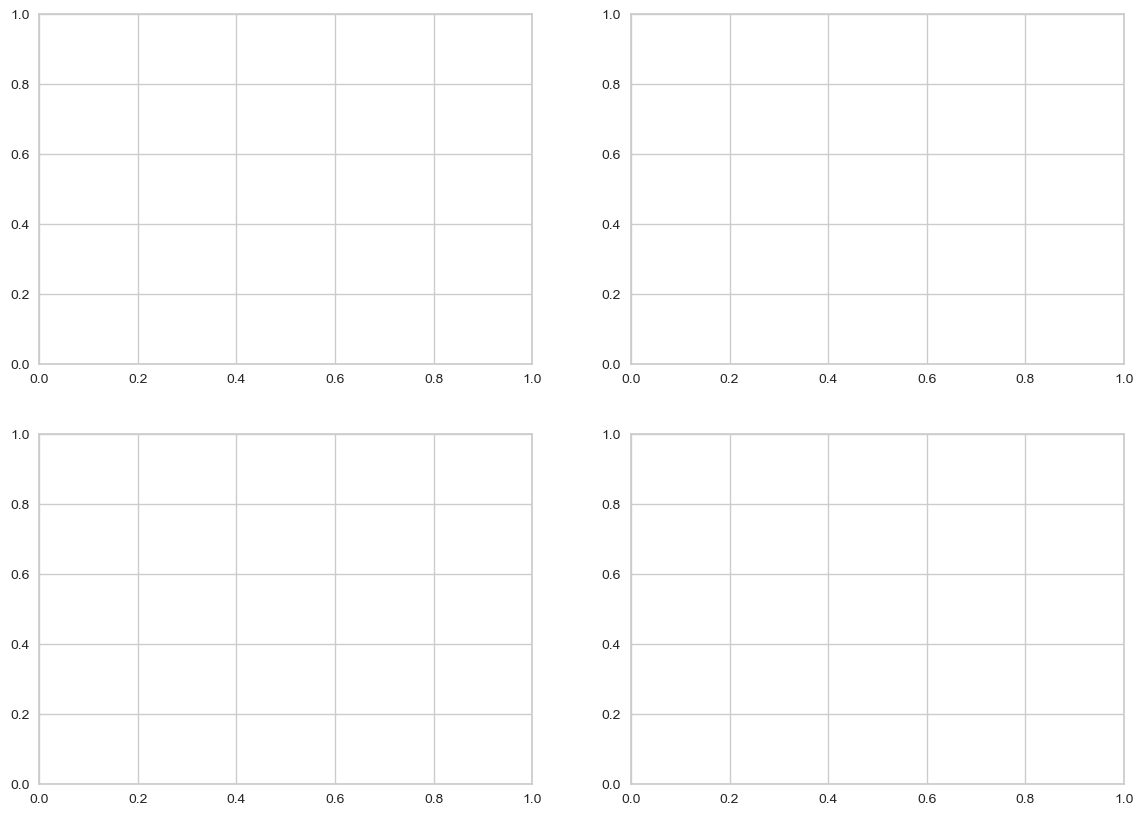

In [154]:
#Performance Evaluation
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

In [155]:
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix

In [156]:
!pip install yellowbrick

In [157]:
# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(X_train, y_train)
knnmatrix.score(X_test, y_test)
knnmatrix.finalize()

C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In 

<Figure size 800x550 with 0 Axes>

In [158]:
# --- KNN ROC AUC ---
knnrocauc = ROCAUC(KNNClassifier, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(X_train, y_train)
knnrocauc.score(X_test, y_test)
knnrocauc.finalize()

C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [159]:
# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(KNNClassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(X_train, y_train)
knncurve.score(X_test, y_test)
knncurve.finalize()

plt.tight_layout()

C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\KESIRAJU TEJASWINI\.conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<Figure size 800x550 with 0 Axes>

In [160]:
#decision tree 